Реализована явная схема Адамса для решения задачи Коши с двумя уравнениями первого порядка ($u'=f(t, u),\:u(0)=u(t_0)=u_0$): $u_{k+1}=u_k + \tau (\frac{3}{2}f_k - \frac{1}{2}f_{k-1}),\:k = 1,..., n - 1$, где $\tau=t_{i+1} - t_i,\:f_k=f(t_k, u_k),\:u_k=u(t_k)$. $t_k:\:k=0,...,n,\:t_0=0,\:t_n=T$. Для этой схемы требуется сначала найти $u_1$, для этого используется явная схема Эйлера: $u_1 = u_0 + \tau f(t_0, u_0)$.

### Реализация

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def Koshi_Adams(t_, f_0, f_1, u_0):
    '''
    t_ - значения t_i
    f_0, f_1 - правые части первого и второго уравнений соответсвенно 
    (функции, принимающие одно число t и массив из двух значений u)
    u_0 - начальные условия
    '''
    t = np.array(t_)
    n = t.shape[0]
    tao = t[1] - t[0]
    u = np.empty((2, n))
    u[:, 0] = np.reshape(u_0, (2))
    f0 = np.array([f_0(t[0], u_0), f_1(t[0], u_0)])
    f1 = np.empty(2)
    # вычислим u_1 с помощью явной схемы Эйлера
    u[:, 1] = u[:, 0] + tao * f0
    # вычислим остальные значения u_k с помощью явной схемы Адамса
    for k in range(1, n - 1):
        f1 = np.array([f_0(t[k], u[:, k]), f_1(t[k], u[:, k])])
        u[:, k + 1] = u[:, k] + (tao / 2) * (3 * f1 - f0)
        f0, f1 = f1, f0
    return u

### Тесты

Протестируем на конкретной задаче Коши ($t \in [0, 1]$):
\begin{equation*}
\begin{cases}
   x'=-2x+4y\\
   y'=-x+3y\\
   x(0)=3\\
   y(0)=0
\end{cases}
\end{equation*}
Её аналитическое решение:
\begin{equation*}
\begin{cases}
   x(t)=4e^{-t}-e^{2t}\\
   y(t)=e^{-t}-e^{2t}
\end{cases}
\end{equation*}
Применим к этой задаче написанную реализацию:

In [16]:
def f0(t, u):
    return -2 * u[0] + 4 * u[1]

def f1(t, u):
    return -u[0] + 3 * u[1]

t = np.linspace(0, 1, 100)
u_0 = np.array([3, 0])
xy = Koshi_Adams(t, f0, f1, u_0)
x_num = xy[0]
y_num = xy[1]
x_an = 4 * np.exp(-t) - np.exp(2 * t)
y_an = np.exp(-t) - np.exp(2 * t)

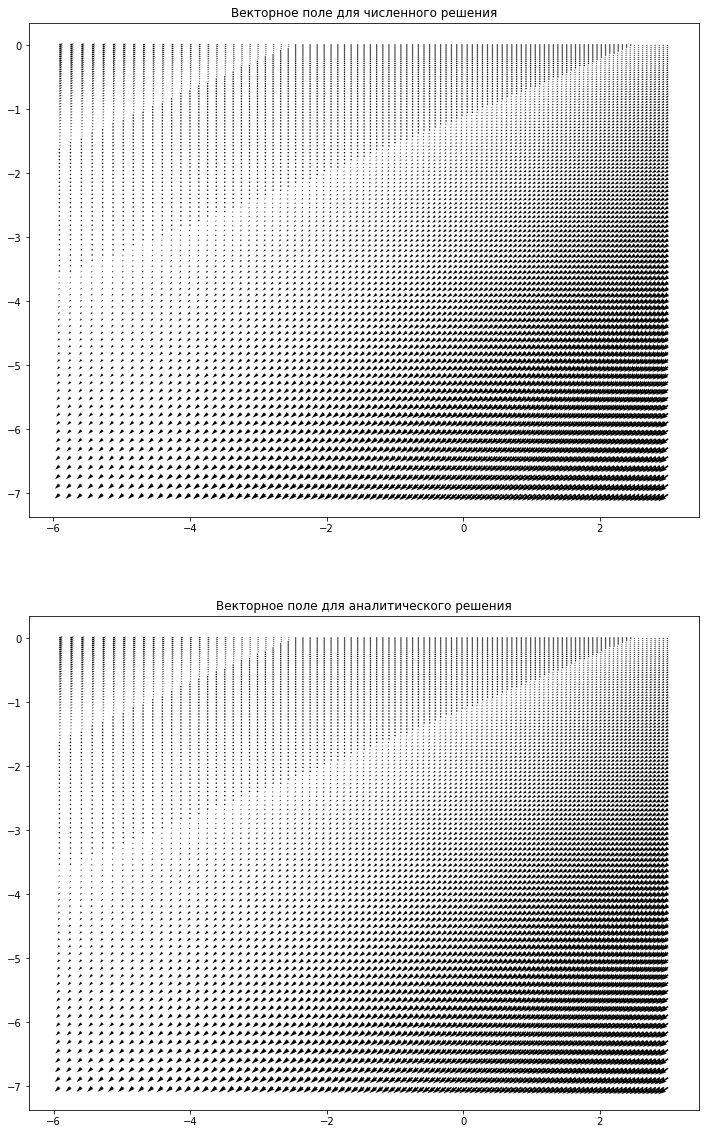

In [17]:
x, y = np.meshgrid(x_num, y_num)
fx = -2 * x + 4 * y
fy = -x + 3 * y
plt.figure(figsize=(12, 20))
plt.subplot(211)
plt.quiver(x_num, y_num, fx, fy)
plt.title('Векторное поле для численного решения')
x, y = np.meshgrid(x_an, y_an)
fx = -2 * x + 4 * y
fy = -x + 3 * y
plt.subplot(212)
plt.quiver(x_an, y_an, fx, fy)
plt.title('Векторное поле для аналитического решения')
plt.show()

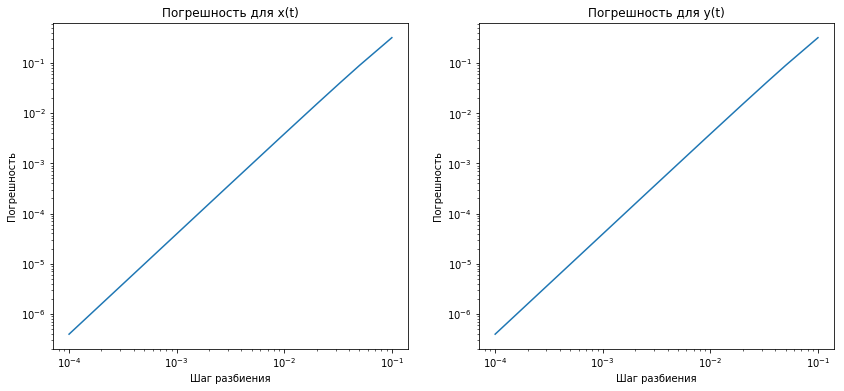

In [22]:
counts = np.arange(10, 10010, 10)
errs_x = np.empty(counts.shape[0])
errs_y = np.empty(counts.shape[0])
for i in range(counts.shape[0]):
    t = np.linspace(0, 1, counts[i] + 1)
    xy = Koshi_Adams(t, f0, f1, u_0)
    x_num = xy[0]
    y_num = xy[1]
    x_an = 4 * np.exp(-t) - np.exp(2 * t)
    y_an = np.exp(-t) - np.exp(2 * t)
    errs_x[i] = np.max(np.abs(x_num - x_an))
    errs_y[i] = np.max(np.abs(y_num - y_an))
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.loglog(1 / counts, errs_x)
plt.title('Погрешность для x(t)')
plt.xlabel('Шаг разбиения')
plt.ylabel('Погрешность')
plt.subplot(122)
plt.loglog(1 / counts, errs_y)
plt.title('Погрешность для y(t)')
plt.xlabel('Шаг разбиения')
plt.ylabel('Погрешность')
plt.show()

Погрешность убывает быстрее, чем шаг, но порядок точности меньше 2 (такое произошло, потому что для вычисления $u_1$ в представленной реализации явной схемы Адамса (с порядком точнсти 2) используется явная схема Эйлера, имеющая порядок точности 1, из-за чего порядок точнсти схемы Адамса ухудшается).